# Data Visualization Styles

This notebook demonstrates specialized plotting styles and techniques for:
- Embedded Systems Engineering
- System Test Engineering
- Power Electronics Engineering

## Setup and Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting defaults
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100
np.random.seed(42)

## 1. Embedded Systems Engineering

### Best Style Choices
- **Development/Debug**: `seaborn-v0_8-notebook`
- **Signal Analysis**: `classic` or `seaborn-v0_8-whitegrid`
- **Documentation**: `seaborn-v0_8-paper`

### Example: Digital Signal Analysis

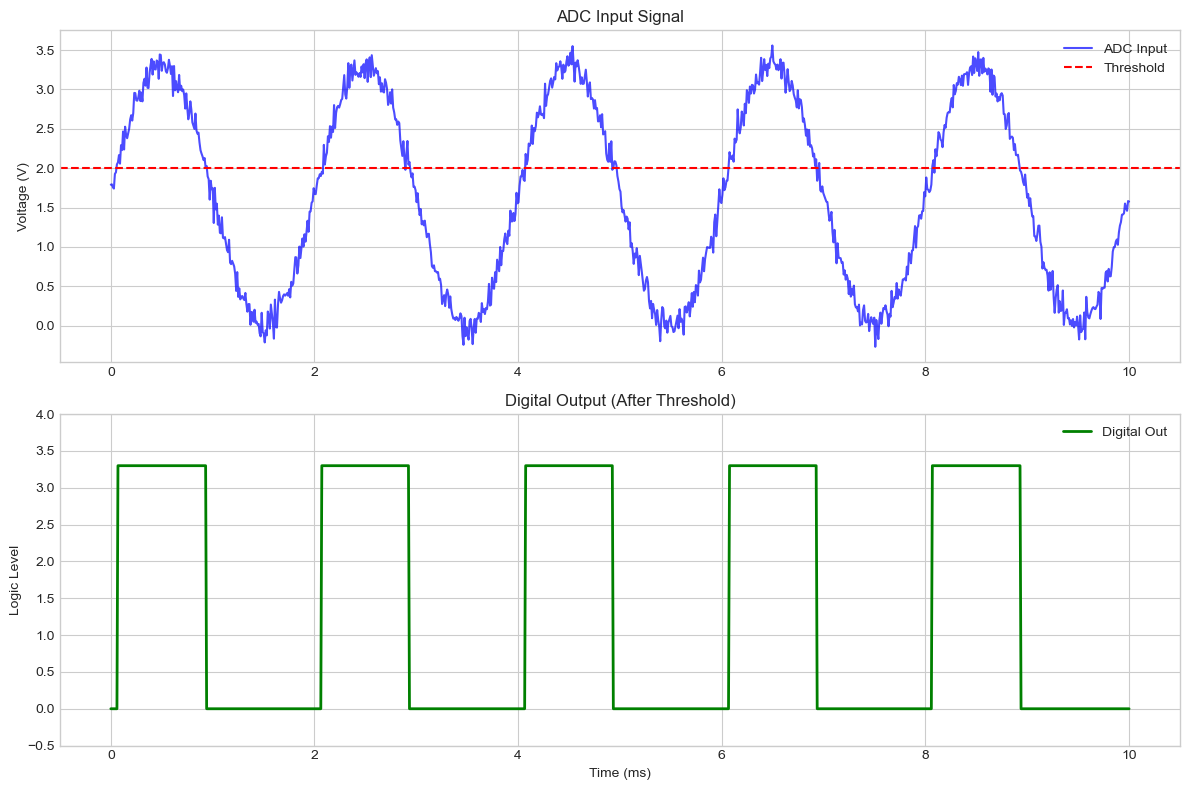

In [9]:
def plot_digital_signals():
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Time base
    t = np.linspace(0, 10, 1000)
    
    # Generate sample signals
    adc_input = 3.3 * (0.5 + 0.5 * np.sin(2*np.pi*0.5*t))
    digital_out = (adc_input > 2.0).astype(float) * 3.3
    
    # Add noise to ADC signal
    adc_input += np.random.normal(0, 0.1, len(t))
    
    # Create plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # ADC Signal
    ax1.plot(t, adc_input, 'b-', label='ADC Input', alpha=0.7)
    ax1.axhline(y=2.0, color='r', linestyle='--', label='Threshold')
    ax1.set_ylabel('Voltage (V)')
    ax1.set_title('ADC Input Signal')
    ax1.legend()
    
    # Digital Output
    ax2.plot(t, digital_out, 'g-', label='Digital Out', linewidth=2)
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('Logic Level')
    ax2.set_title('Digital Output (After Threshold)')
    ax2.set_ylim(-0.5, 4)
    ax2.legend()
    
    plt.tight_layout()
    
plot_digital_signals()

## 2. System Test Engineering

### Best Style Choices
- **Test Reports**: `seaborn-v0_8-paper`
- **Data Analysis**: `tableau-colorblind10`
- **Presentations**: `seaborn-v0_8-talk`

### Example: Test Results Analysis

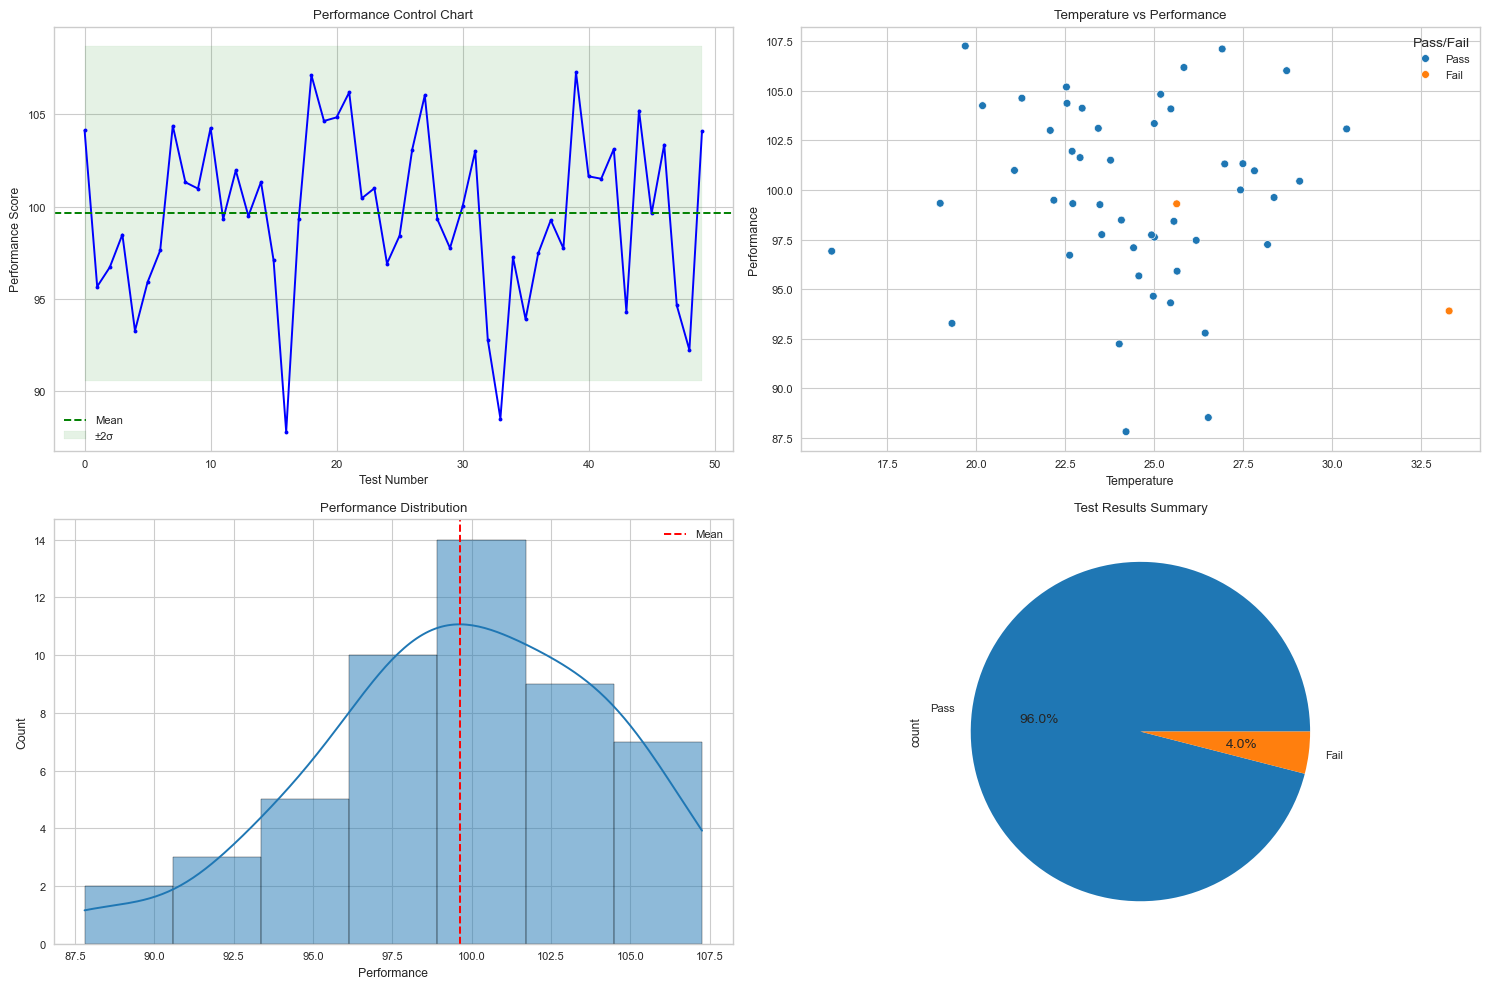

In [12]:
def plot_test_results():
    plt.style.use('seaborn-v0_8-paper')
    
    # Generate sample test data
    n_tests = 50
    test_data = pd.DataFrame({
        'Temperature': np.random.normal(25, 3, n_tests),
        'Performance': np.random.normal(100, 5, n_tests),
        'Pass/Fail': np.random.choice(['Pass', 'Fail'], n_tests, p=[0.9, 0.1])
    })
    
    # Create subplot grid
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Control Chart
    ax1.plot(test_data.index, test_data['Performance'], 'b.-')
    ax1.axhline(y=test_data['Performance'].mean(), color='g', linestyle='--', label='Mean')
    ax1.fill_between(test_data.index,
                     test_data['Performance'].mean() - 2*test_data['Performance'].std(),
                     test_data['Performance'].mean() + 2*test_data['Performance'].std(),
                     color='g', alpha=0.1, label='±2σ')
    ax1.set_title('Performance Control Chart')
    ax1.set_xlabel('Test Number')
    ax1.set_ylabel('Performance Score')
    ax1.legend()
    
    # 2. Temperature vs Performance
    sns.scatterplot(data=test_data, x='Temperature', y='Performance', 
                    hue='Pass/Fail', ax=ax2)
    ax2.set_title('Temperature vs Performance')
    
    # 3. Performance Distribution
    sns.histplot(data=test_data, x='Performance', kde=True, ax=ax3)
    ax3.axvline(x=test_data['Performance'].mean(), color='r', 
                linestyle='--', label='Mean')
    ax3.set_title('Performance Distribution')
    ax3.legend()
    
    # 4. Pass/Fail Summary
    test_data['Pass/Fail'].value_counts().plot(kind='pie', ax=ax4, 
                                               autopct='%1.1f%%')
    ax4.set_title('Test Results Summary')
    
    plt.tight_layout()
    
plot_test_results()

## 3. Power Electronics Engineering

### Best Style Choices
- **Waveform Analysis**: `dark_background`
- **Data Analysis**: `classic`
- **Documentation**: `seaborn-v0_8-paper`

### Example: Power Analysis

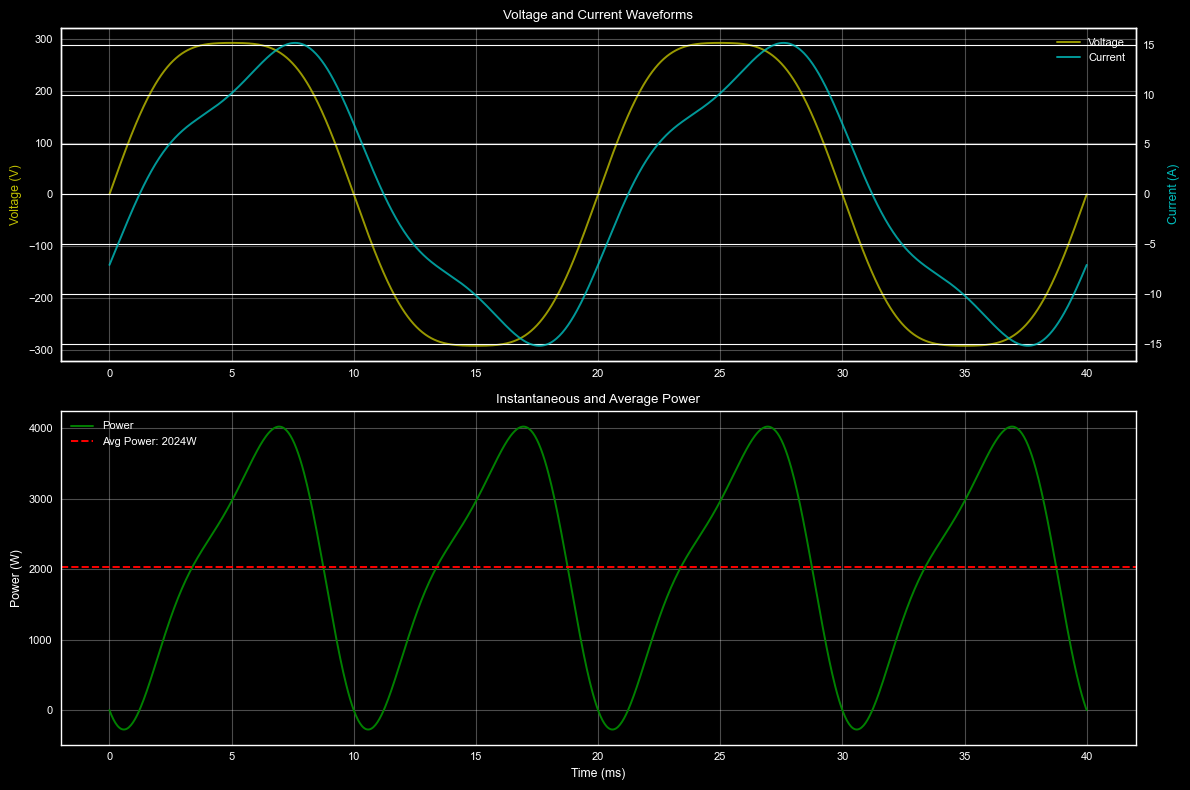

In [15]:
def plot_power_analysis():
    plt.style.use('dark_background')
    
    # Generate power waveforms
    t = np.linspace(0, 0.04, 1000)  # 2 cycles at 50Hz
    v_amplitude = 230 * np.sqrt(2)
    i_amplitude = 10 * np.sqrt(2)
    
    # Add some harmonics and noise
    voltage = v_amplitude * np.sin(2*np.pi*50*t) + \
             0.1 * v_amplitude * np.sin(2*np.pi*150*t)
    current = i_amplitude * np.sin(2*np.pi*50*t - np.pi/6) + \
             0.15 * i_amplitude * np.sin(2*np.pi*150*t)
    
    # Calculate power
    power = voltage * current
    
    # Create plots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Voltage and Current
    ax1.plot(t*1000, voltage, 'y-', label='Voltage', alpha=0.8)
    ax1_twin = ax1.twinx()
    ax1_twin.plot(t*1000, current, 'c-', label='Current', alpha=0.8)
    
    ax1.set_ylabel('Voltage (V)', color='y')
    ax1_twin.set_ylabel('Current (A)', color='c')
    ax1.set_title('Voltage and Current Waveforms')
    ax1.grid(True, alpha=0.3)
    
    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1_twin.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2)
    
    # Power
    ax2.plot(t*1000, power, 'g-', label='Power')
    ax2.axhline(y=np.mean(power), color='r', linestyle='--', 
                label=f'Avg Power: {np.mean(power):.0f}W')
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('Power (W)')
    ax2.set_title('Instantaneous and Average Power')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    
plot_power_analysis()

## Style Selection Guidelines

### For Development/Debug:
- Use `seaborn-v0_8-notebook` or `classic`
- Enable grid lines for measurement
- Use high contrast colors

### For Documentation:
- Use `seaborn-v0_8-paper`
- Include clear labels and units
- Add descriptive titles and legends

### For Presentations:
- Use `seaborn-v0_8-talk`
- Increase font sizes
- Use color-blind friendly palettes

### For Waveform Analysis:
- Consider `dark_background` for oscilloscope-like display
- Use appropriate line styles for different signals
- Include grid for measurements

### For Data Analysis:
- Use `tableau-colorblind10` for multiple data series
- Include statistical annotations
- Add error bounds and confidence intervals